In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
class LinearRegression:
    def __init__(self, num_iter=500, learning_rate=0.01, tol=1e-4):
        self.n_iter = num_iter
        self.lr = learning_rate
        self.tol = tol
    
    def _init_transform(self, X_train, y_train):
        self.X_train = np.c_[np.ones(X_train.shape[0]), X_train]
        self.y_train = np.copy(y_train)
        self.w_ = np.zeros((self.X_train.shape[1], 1))
        
    def _cost_func(self, X_train, y_train):
        m = X_train.shape[0]
        return ((X_train @ self.w_ - y_train).T @ (X_train @ self.w_ - y_train)) / (2*m)
    
    def fit(self, X_train, y_train):
        self._init_transform(X_train, y_train)
        n_samples = self.X_train.shape[0]
        
        prev_cost = self._cost_func(self.X_train, self.y_train)
        self.costs_ = []
        
        for i in range(self.n_iter):
            dw = self.X_train.T @ (self.X_train @ self.w_ - self.y_train) / n_samples
            
            self.w_ -= self.lr * dw
            
            #write cost every epoch
            if i % n_samples == 0:
                print(f'\t------Epoch: {i // n_samples}------')
                print(f'Current weights: {self.w_}\nCurrent cost: {np.squeeze(prev_cost)}\n')
                self.costs_.append(np.squeeze(prev_cost))
            
            cost = self._cost_func(self.X_train, self.y_train)
            
            if abs(prev_cost - cost) < self.tol:
                break
            prev_cost = cost
    
    def predict(self, X_test):
        X_test_new = np.c_[np.ones(X_test.shape[0]), X_test]
        return X_test_new @ self.w_

In [12]:
def load_data():
    train_data = np.genfromtxt('lab_1_train.csv', delimiter=',', skip_header=1, usecols=(1, 2))
    test_data = np.genfromtxt('lab_1_test.csv', delimiter=',', skip_header=1, usecols=(1, 2))
    
    X_train, y_train = train_data[:, 0], train_data[:, 1]
    X_test, y_test = test_data[:, 0], test_data[:, 1]
    
    return X_train[:, np.newaxis], X_test[:, np.newaxis], y_train[:, np.newaxis], y_test[:, np.newaxis]

In [14]:
X_train, X_test, y_train, y_test = load_data()
print(f'Number of samples in train data: {X_train.shape[0]}')
print(f'Number of samples in test data: {X_test.shape[0]}')

Number of samples in train data: 60
Number of samples in test data: 40


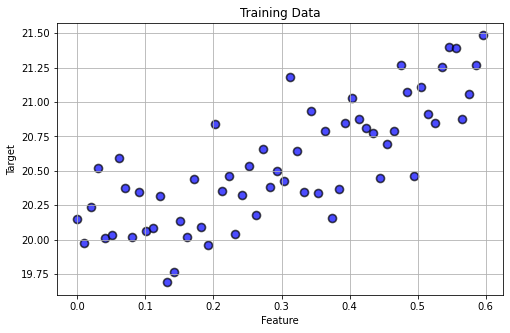

In [16]:
#visualize training data
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, c='b', s=64, alpha=.7, linewidths=1.65, edgecolors='black')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Training Data')
plt.grid(True)

In [17]:
#standardize the data
mu = X_train.mean()
std = X_train.std()

X_train_std = (X_train - mu) / std
X_test_std = (X_test - mu) / std

In [26]:
lreg = LinearRegression(num_iter=1200)
lreg.fit(X_train_std, y_train)

	------Epoch: 0------
Current weights: [[0.20549563]
 [0.00346149]]
Current cost: 211.23870094240348

	------Epoch: 1------
Current weights: [[9.41817149]
 [0.15864548]]
Current cost: 63.266309848762724

	------Epoch: 2------
Current weights: [[14.45894828]
 [ 0.24355543]]
Current cost: 18.966277499727184

	------Epoch: 3------
Current weights: [[17.21704279]
 [ 0.29001447]]
Current cost: 5.703716479923983

	------Epoch: 4------
Current weights: [[18.72615252]
 [ 0.31543485]]
Current cost: 1.7331657720116278

	------Epoch: 5------
Current weights: [[19.55187193]
 [ 0.32934377]]
Current cost: 0.5444607473513767

	------Epoch: 6------
Current weights: [[20.00366979]
 [ 0.33695413]]
Current cost: 0.18858577191365083

	------Epoch: 7------
Current weights: [[20.25087399]
 [ 0.34111819]]
Current cost: 0.08204378250883944

	------Epoch: 8------
Current weights: [[20.38613341]
 [ 0.34339659]]
Current cost: 0.050147200029632806



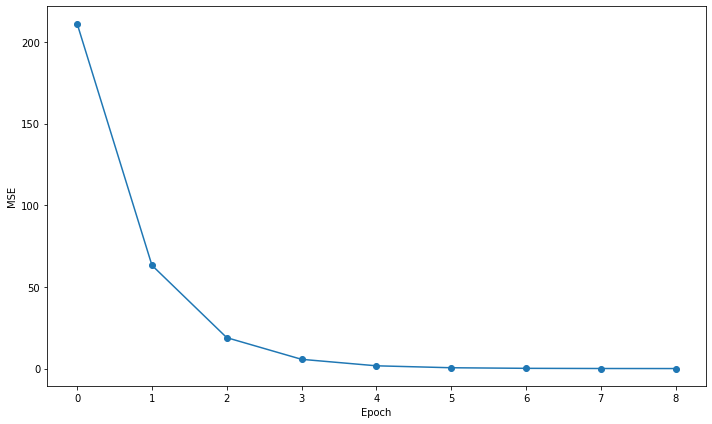

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(lreg.costs_)), lreg.costs_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.tight_layout()

In [33]:
#MSE for test data
m = X_test.shape[0]
y_pred = lreg.predict(X_test_std)
mse = (y_pred - y_test).T @ (y_pred - y_test) / (2*m)
print(f'Cost function for test set: {np.squeeze(mse)}')

Cost function for test set: 0.048217203123177614


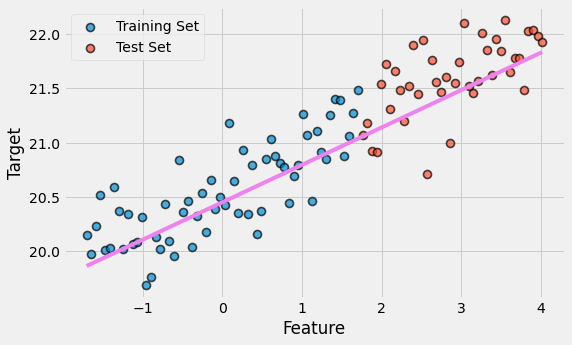

In [35]:
#plot training, test data and learned line
data = np.r_[X_train_std, X_test_std]
x_min, x_max = data.min(), data.max()
xx = np.linspace(x_min, x_max, num=15)[:, np.newaxis]
y_pred = lreg.predict(xx)

plt.figure(figsize=(8, 5))
plt.style.use('fivethirtyeight')
plt.scatter(X_train_std, y_train, s=64, alpha=.7, linewidths=1.65, edgecolors='black', label='Training Set')
plt.scatter(X_test_std, y_test, s=64, alpha=.7, linewidths=1.65, edgecolors='black', label='Test Set')
plt.plot(xx, y_pred, c='violet')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend(loc='best')